<a href="https://colab.research.google.com/github/alayagithub/Python_Geopandas/blob/main/First_GIS_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installation of Geopandas**

In [4]:
#following is the code to install geopandas
pip install geopandas

In [51]:
'''import the installed geopandas package so that we can
use its functions (and I am using shortcut as gpd and
It will be stored as GPD )'''
import geopandas as gpd
#import matplotlib which is for the visulaization of our data
import matplotlib.pyplot as plt
#We have to make this matplotlib as inline
%matplotlib inline


**Adding Vector Data (Shp and geojson)**

In [15]:
#Adding geojson file into the python/geopackage
# We use gpd.read_file('path of the geojson file')
#municipality_Json is the name we are going to give the added geojson file
municipality_Json = gpd.read_file('/content/municipality.geojson')

In [16]:
#similarly, we are adding shapefile here
#municipality_shp is the name we are going to give the added shape file
municipality_shp = gpd.read_file('/content/municipality.shp')

**Reading Metadata**

In [18]:
#length of a file (i.e. column number)
len(municipality_shp)

775

In [19]:
#displaying the title/column names (e.g. PROVINCE, PR_NAME, etc.) of the vector data
municipality_shp.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768..."
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.66620 27.73004, 87.66659 27.73000..."
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [22]:
#knowing the type of geometry of features like point, line and polygon
municipality_shp.geom_type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
770    Polygon
771    Polygon
772    Polygon
773    Polygon
774    Polygon
Length: 775, dtype: object

In [25]:
#knowing the no. of type of features (no. of rows, no. of columns)
municipality_shp.shape

(775, 6)

In [27]:
#knowing the coordinate reference system of our file
municipality_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
#knowing the type of our file/data
type(municipality_shp)

geopandas.geodataframe.GeoDataFrame

**Map Visualization**

<Axes: >

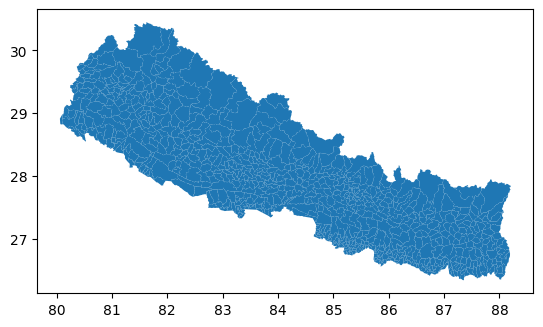

In [30]:
#Plotting the map/vector data/shapefile we use plot()
municipality_shp.plot()

<Axes: >

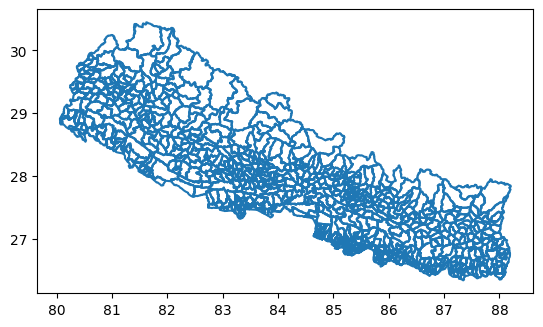

In [52]:
#Plotting only the boundary of the polygons
municipality_shp.boundary.plot()

<Axes: >

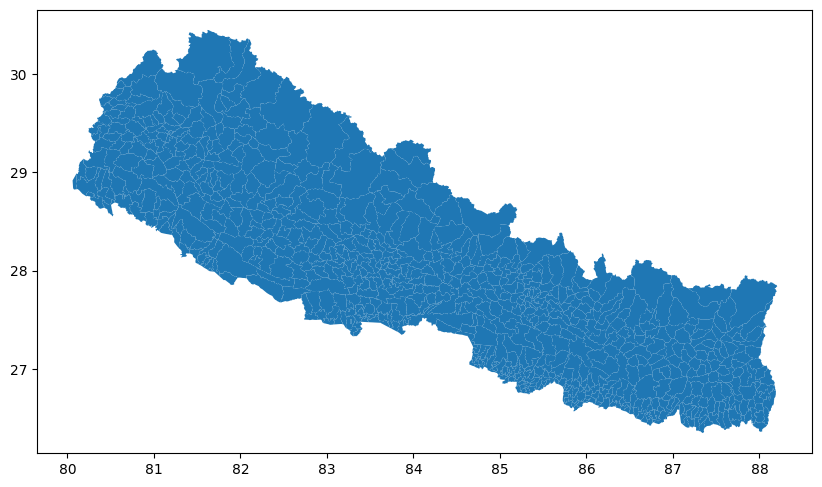

In [32]:
#Specifying hte size of map to plot e.g. 10*10
municipality.plot(figsize=(10,10))

<Axes: >

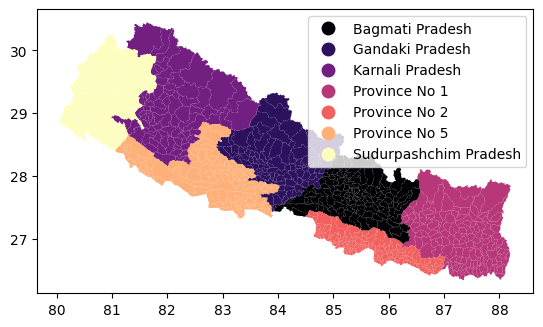

In [53]:
#colouring the map using cmap and writing the legend of the mpa
municipality_shp.plot("PR_NAME", cmap='magma', legend=True)

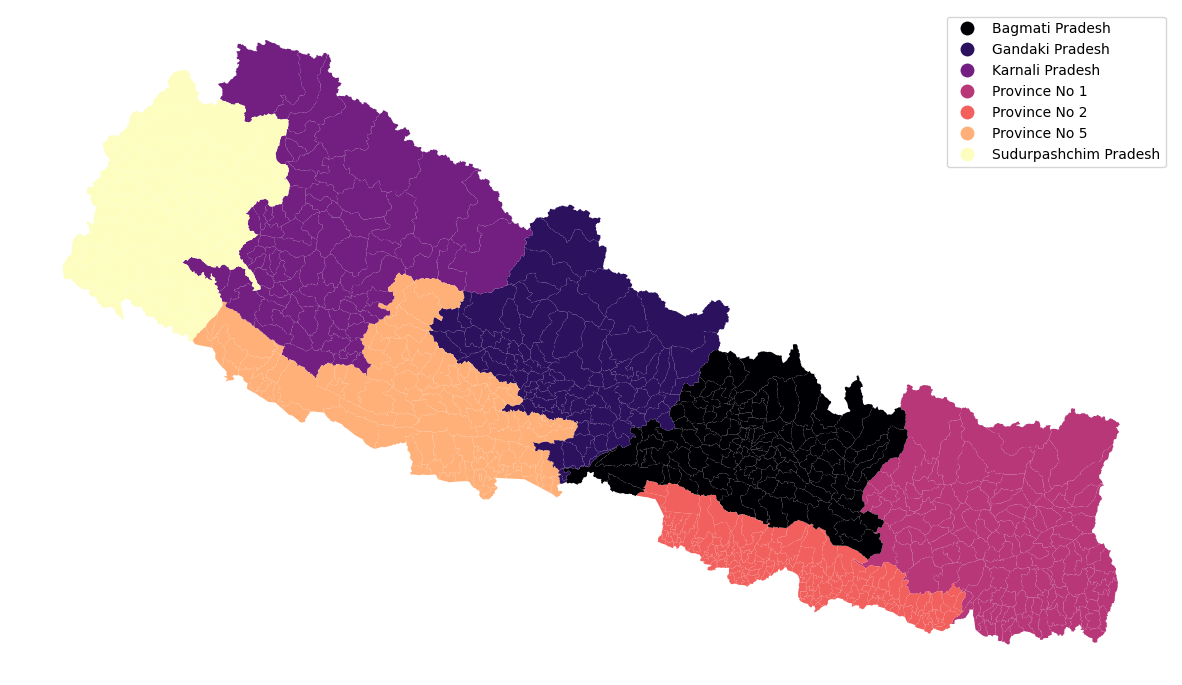

In [41]:
#removing the map axes
ax=municipality_shp.plot("PR_NAME", cmap='magma', legend=True, figsize=(15,15))
ax.set_axis_off()

**Writing Data**

In [42]:
#importing the municipality.shp file into abc
abc=gpd.read_file('/content/municipality.shp')

In [44]:
#adding/saving abc file (i.e. municipality.shp) to the specific
#folder or file and we'have save
#it as municipality.shp again.
abc.to_file('/content/sample_data/output/municipality.shp')

In [46]:
#saving abc file as geojson file
#give driver and encoding (utf-8).
abc.to_file('/content/sample_data/output/municipality.geojson', driver= 'GeoJSON', encoding='utf-8')

In [47]:
#saving abc file or data into geopackage file
abc.to_file('/content/sample_data/output/municipality.gpkg', driver= 'GPKG', layer= 'palika', encoding='utf-8')

**Working with Attribute Data**

In [48]:
#extracting a single district (all the municipalities of rupandehi) from whole municipalities of Nepal
rupandehi=municipality_shp[municipality['DISTRICT']=='RUPANDEHI']


<Axes: >

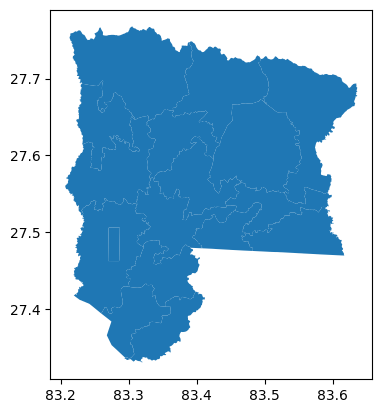

In [49]:
rupandehi.plot()